# Fiftyone 사용방법 정리


### 설치, 데이터 준비

In [ ]:
!pip install fiftyone
!pip install --upgrade --no-cache-dir gdown
!pip install --upgrade fastai
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.4/564.4 KB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 KB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━

In [ ]:
import os
import gdown

os.mkdir('example_data1')
os.chdir('example_data1')

id1 = '1j9Is3BRfiMnK4TixM2fap-AHj40FM0eK'
output1 = 'detection_example.zip'
gdown.download(id=id1, output=output1, quiet=False)
!unzip -qq "/content/example_data1/detection_example.zip"

os.chdir('..')
os.mkdir('example_data2')
os.chdir('example_data2')

id2 = '1qWpAOTHQyMU8pjlFh5KIluwvIhEZYqHT'
output2 = 'dataset.zip'
gdown.download(id=id2, output=output2, quiet=False)
!unzip -qq "/content/example_data2/dataset.zip"

os.chdir('..')

Downloading...
From: https://drive.google.com/uc?id=1j9Is3BRfiMnK4TixM2fap-AHj40FM0eK
To: /content/example_data1/detection_example.zip
100%|██████████| 19.3M/19.3M [00:00<00:00, 35.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qWpAOTHQyMU8pjlFh5KIluwvIhEZYqHT
To: /content/example_data2/dataset.zip
100%|██████████| 45.0M/45.0M [00:00<00:00, 163MB/s]


&nbsp;

## 1. Classification

### 데이터 탐색

In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz

dataset1 = fo.Dataset.from_dir(dataset_dir="./example_data2/dataset", dataset_type=fo.types.ImageClassificationDirectoryTree, name="OCR 제조 데이터셋")
dataset1.persistent = True

print(dataset1) # dataset 정보 확인

Migrating database to v0.19.1


INFO:fiftyone.migrations.runner:Migrating database to v0.19.1


 100% |█████████████| 13316/13316 [10.6s elapsed, 0s remaining, 1.5K samples/s]      


INFO:eta.core.utils: 100% |█████████████| 13316/13316 [10.6s elapsed, 0s remaining, 1.5K samples/s]      


Name:        OCR 제조 데이터셋
Media type:  image
Num samples: 13316
Persistent:  True
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)


In [ ]:
import fiftyone.brain as fob

# 이미지별 상대적 고유값 추출 (이미지가 고유한 확률이 나옴)
fob.compute_uniqueness(dataset1)

## 유사 이미지 계산 (특정이미지 선택후 유사이미지 계산기능 사용을 위해)
fob.compute_similarity(dataset1, brain_key="similarity")

### 데이터셋에 이미지 meta 정보 넣기
dataset1.compute_metadata(num_workers=10)

INFO:fiftyone.core.models:Downloading model from Google Drive ID '1SIO9XreK0w1ja4EuhBWcR10CnWxCOsom'...


 100% |████|  100.6Mb/100.6Mb [482.3ms elapsed, 0s remaining, 208.5Mb/s]      


INFO:eta.core.utils: 100% |████|  100.6Mb/100.6Mb [482.3ms elapsed, 0s remaining, 208.5Mb/s]      


Computing embeddings...


INFO:fiftyone.brain.internal.core.utils:Computing embeddings...


 100% |█████████████| 13316/13316 [16.2s elapsed, 0s remaining, 1.2K samples/s]      


INFO:eta.core.utils: 100% |█████████████| 13316/13316 [16.2s elapsed, 0s remaining, 1.2K samples/s]      


Computing uniqueness...


INFO:fiftyone.brain.internal.core.uniqueness:Computing uniqueness...


Uniqueness computation complete


INFO:fiftyone.brain.internal.core.uniqueness:Uniqueness computation complete


INFO:fiftyone.core.models:Downloading model from 'https://download.pytorch.org/models/mobilenet_v2-b0353104.pth'...


 100% |████|  108.4Mb/108.4Mb [46.7ms elapsed, 0s remaining, 2.3Gb/s]       


INFO:eta.core.utils: 100% |████|  108.4Mb/108.4Mb [46.7ms elapsed, 0s remaining, 2.3Gb/s]       
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

Computing embeddings...


INFO:fiftyone.brain.internal.core.utils:Computing embeddings...


 100% |█████████████| 13316/13316 [2.5m elapsed, 0s remaining, 88.3 samples/s]      


INFO:eta.core.utils: 100% |█████████████| 13316/13316 [2.5m elapsed, 0s remaining, 88.3 samples/s]      


Computing metadata...


INFO:fiftyone.core.metadata:Computing metadata...


 100% |█████████████| 13316/13316 [44.9s elapsed, 0s remaining, 334.1 samples/s]      


INFO:eta.core.utils: 100% |█████████████| 13316/13316 [44.9s elapsed, 0s remaining, 334.1 samples/s]      


In [ ]:
sess = fo.launch_app(dataset1)

In [ ]:
sess.freeze()  # colab 세션 끊겨도 화면 이미지 보이게 할려고 사용

&nbsp;


### model 훈련

In [ ]:
import numpy as np
from fastai.data.all import *
from fastai.vision.data import *
from fastai.vision.all import *
import splitfolders
import fastai
from fiftyone import ViewField as F

- data_split (train : val : test)

In [ ]:
splitfolders.ratio("./example_data2/dataset", output="./classification_data/",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values

Copying files: 13316 files [00:01, 7679.96 files/s]


- Data Load

166 42


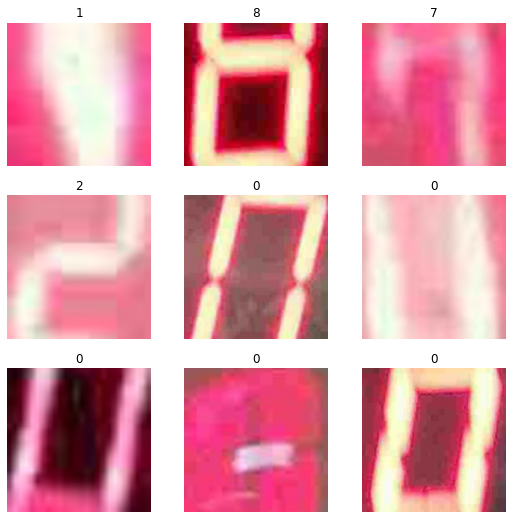

In [ ]:
dblock = DataBlock(blocks = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = parent_label,
                   item_tfms= [Resize(224)]
                   )

data = dblock.dataloaders('./classification_data', bs=64)

print(len(data.train), len(data.valid))
data.show_batch()

- model load

In [ ]:
learner1 = cnn_learner(data, resnet18, metrics=[accuracy], pretrained=False, n_out=data.c).to_fp16()
learner2 = cnn_learner(data, resnet34, metrics=[accuracy], pretrained=False,  n_out=data.c).to_fp16()

/usr/local/lib/python3.8/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


- train

In [ ]:
learner1.fit_one_cycle(100,cbs=[EarlyStoppingCallback(monitor='accuracy', min_delta=0.01, patience=5),SaveModelCallback(monitor='accuracy', min_delta=0.01, fname='res18')])
learner2.fit_one_cycle(100,cbs=[EarlyStoppingCallback(monitor='accuracy', min_delta=0.01, patience=5),SaveModelCallback(monitor='accuracy', min_delta=0.01, fname='res34')])

epoch,train_loss,valid_loss,accuracy,time
0,1.893884,0.878295,0.715359,00:25
1,1.126130,0.460141,0.847540,00:24
2,0.759122,0.300841,0.907247,00:24
3,0.591500,0.300532,0.907999,00:24
4,0.500930,0.194240,0.940668,00:23
5,0.415007,0.198503,0.936538,00:24
6,0.400559,0.271453,0.903492,00:23
7,0.335736,0.165839,0.951558,00:24
8,0.325614,0.162356,0.950432,00:24
9,0.289492,0.222500,0.933534,00:24


Better model found at epoch 0 with accuracy value: 0.7153586149215698.
Better model found at epoch 1 with accuracy value: 0.8475403785705566.
Better model found at epoch 2 with accuracy value: 0.9072474837303162.
Better model found at epoch 4 with accuracy value: 0.9406684041023254.
Better model found at epoch 7 with accuracy value: 0.9515584111213684.
Better model found at epoch 12 with accuracy value: 0.966579020023346.
No improvement since epoch 12: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,2.255995,1.064054,0.648892,00:32
1,1.265334,0.598852,0.808862,00:33
2,0.817834,0.359354,0.889974,00:32
3,0.579202,0.216324,0.929403,00:32
4,0.436253,0.229190,0.929027,00:32
5,0.402852,0.292126,0.908750,00:32
6,0.357432,0.206814,0.941419,00:32
7,0.353496,0.239372,0.929403,00:32
8,0.307017,0.181658,0.947052,00:33
9,0.286166,0.215690,0.939917,00:32


Better model found at epoch 0 with accuracy value: 0.6488922238349915.
Better model found at epoch 1 with accuracy value: 0.8088622093200684.
Better model found at epoch 2 with accuracy value: 0.8899737000465393.
Better model found at epoch 3 with accuracy value: 0.9294029474258423.
Better model found at epoch 6 with accuracy value: 0.9414194226264954.
Better model found at epoch 11 with accuracy value: 0.9541870355606079.
Better model found at epoch 16 with accuracy value: 0.9688321352005005.
No improvement since epoch 16: early stopping


- resnet18 결과

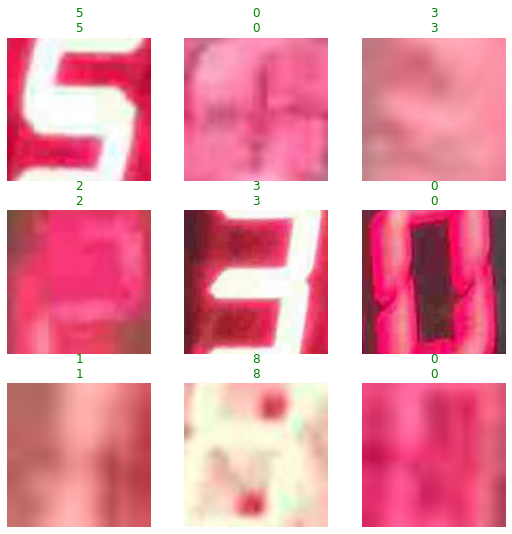

In [ ]:
learner1.show_results()

- resnet34 결과

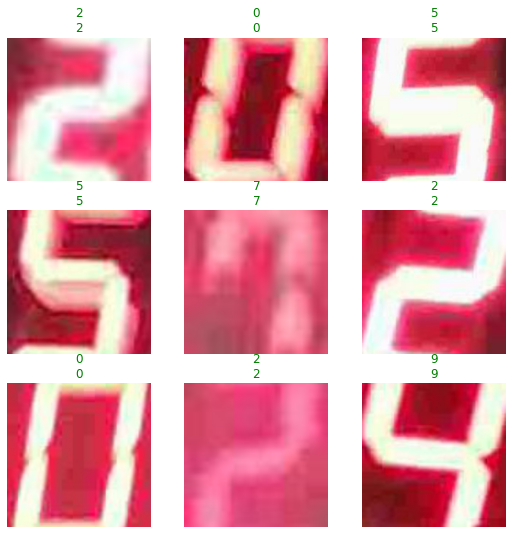

In [ ]:
learner2.show_results()

- model load

In [ ]:
learner1 = cnn_learner(data, resnet18, metrics=[accuracy], pretrained=False, n_out=data.c).to_fp16()
learner1.load("./res18")

learner2 = cnn_learner(data, resnet34, metrics=[accuracy], pretrained=False,  n_out=data.c).to_fp16()
learner2.load("./res34")

/usr/local/lib/python3.8/dist-packages/fastai/learner.py:59: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


- 예측 결과 및 GT 정보 dataset 입력

In [ ]:
from PIL import Image
from glob import glob
from tqdm import tqdm

dataset2 = fo.Dataset()
img_list = glob('./classification_data/test/*/*.jpg')

samples = []
for img in tqdm(img_list):

    # fiftyone sample에 img 삽입
    sample = fo.Sample(filepath=img)
    gt = img.split('/')[-2]
    img_set = Image.open(img).convert('RGB')

    # ground truth sample 삽입
    sample['ground_truth'] = fo.Classification(label= gt)

    # model 별로 pred 표본 삽입
    sample['resnet18'] = fo.Classification(label= learner1.predict(img)[0])
    sample['resnet34'] = fo.Classification(label= learner2.predict(img)[0])
    samples.append(sample)

# dataset title 넣기
dataset2 = fo.Dataset('Classification-output')
dataset2.add_samples(samples)

- dataset 정보 입력

In [ ]:
import fiftyone.brain as fob

dataset2.persistent = True

# 이미지별 상대적 고유값 추출 (이미지가 고유한 확률이 나옴)
fob.compute_uniqueness(dataset2)

## 유사이미지 계산 (특정이미지 선택후 유사이미지 계산기능 사용을 위해)
fob.compute_similarity(dataset2, brain_key="similarity")

### 데이터셋에 이미지 meta 정보 넣기
dataset2.compute_metadata(num_workers=10)

- 결과 시각화

In [ ]:
session = fo.launch_app(dataset2)

- 맞춘 결과만 시각화 (resnet18)

In [ ]:
session.view = (
    dataset2
    .match(F("ground_truth.label") == F("resnet18.label"))
    .sort_by(F("ground_truth.detections").length(), reverse=True)
)

- 틀린 결과만 시각화 (resnet18)

In [ ]:
session.view = (
    dataset2
    .match(F("ground_truth.label") != F("resnet18.label"))
    .sort_by(F("ground_truth.detections").length(), reverse=True)
)

&nbsp;

In [ ]:
session.freeze()

## 2. Object Detection

- mmdetection faster rcnn , yolov5 를 사용함

In [ ]:
import json
import fiftyone as fo
from pycocotools.coco import COCO
import os
import cv2
import re

def get_pred_samples(json_data, img_id,option):
    # 해당 img_id에 맞는 img 불러오기
    img = cv2.imread(f'./example_data1/data/test/{[k for k, v in img_path_to_id.items() if v == img_id][0]}')

     # image에 해당하는 annotations load
    pred_annos = [data for data in json_data if data['image_id'] == img_id]
    prediction_samples = []
    x_, y_ = img.shape[:2] # height, width 가져오기

    for pred in pred_annos:
        if option ==0:
            bbox = min_max(pred['bbox'],x_, y_)
        else:
            bbox = yolobbox2bbox(pred['bbox'],x_, y_)
        prediction_samples.append(
            fo.Detection(label=id_to_cat[pred['category_id']],
                         bounding_box=bbox, confidence=pred['score'])
        )
    return prediction_samples


# bbox 정규화용

def yolobbox2bbox(bbox, x_, y_):

    x = bbox[0] / y_
    y = bbox[1] / x_
    w = (bbox[2] - bbox[0]) / y_
    h = (bbox[3] - bbox[1]) / x_
    return [x, y, w, h]

def min_max(bbox, x_, y_):
    x, w = [x / y_ for x in bbox[::2]]
    y, h = [x / x_ for x in bbox[1::2]]
    return [x, y, w, h]

- 데이터 준비

In [ ]:
# GT 로드
coco = COCO('./example_data1/data/test/_annotations.coco.json')

# image name : id 매칭
img_path_to_id = {x['file_name']: x['id'] for x in coco.loadImgs(coco.getImgIds())}

# image 목록 가져오기
img_path_list = ['./example_data1/data/test/' + anno['file_name']
                 for anno in coco.loadImgs(coco.getImgIds())]

# img_path_list로 Dataset 생성
dataset3 = fo.Dataset.from_images(img_path_list)

# id : category 매칭
id_to_cat = {v['id']: v['name'] for v in coco.loadCats(coco.getCatIds())}

# faster rcnn pred
with open('./example_data1/test_results.bbox.json', 'r') as f:
    faster_data = json.load(f)

# yolov5 pred
with open('./example_data1/yolov5_pred.json', 'r') as f:
    yolov5_data = json.load(f)


- dataset 및 sample 입력

In [ ]:
# img 별 iteration
samples = []
for img_id in coco.getImgIds():
    # fiftyone sample에 img 삽입
    sample = fo.Sample(filepath='./example_data1/data/test/' +
                       coco.loadImgs(img_id)[0]['file_name'])

    detections = []
    # annotation 별 iteration
    for ann_id in coco.getAnnIds(imgIds=img_id):
        obj = coco.loadAnns(ann_id)[0]

        # 해당 이미지 가져와서 가로 세로 가져오기
        img = cv2.imread(f'./example_data1/data/test/{[k for k, v in img_path_to_id.items() if v == img_id][0]}')
        x_ , y_ = img.shape[:2]

        # label, bbox 정보 가져오기
        label = id_to_cat[obj['category_id']]
        bbox = min_max(obj['bbox'],x_, y_)

        # fiftyone detections sample에 annotation 삽입
        detections.append(
            fo.Detection(label=label, bounding_box=bbox)
        )

    # model 별로 fiftyone annotation 표본 얻기
    f_rcnn_preds = get_pred_samples(faster_data, img_id=img_id, option=0)
    yolov5_preds = get_pred_samples(yolov5_data, img_id=img_id, option=1)

    # ground truth가 있을시에 sample 삽입
    if detections:
        sample['ground_truth'] = fo.Detections(detections=detections)

    # model 별로 annotation 표본 삽입
    sample['faster-rcnn'] = fo.Detections(detections=f_rcnn_preds)
    sample['yolov5'] = fo.Detections(detections=yolov5_preds)
    samples.append(sample)

# dataset title 넣기
dataset3 = fo.Dataset('ObjectDetection-Example')
dataset3.add_samples(samples)


dataset3.persistent = True

# meta data 계산
dataset3.compute_metadata(num_workers=10)

# 이미지별 상대적 고유값 추출 (이미지가 고유한 확률이 나옴)
fob.compute_uniqueness(dataset3)

## 유사이미지 계산 (특정이미지 선택후 유사이미지 계산기능 사용을 위해)
fob.compute_similarity(dataset3, brain_key="similarity")

- 샘플별 detection error 찾기
  - mistakenness: 각 샘플에서 실측 객체의 최대 오류
  - possible_missing: 각 샘플에서 가능한 누락된 실측 객체의 수

- yolov5

In [ ]:
fob.compute_mistakenness(dataset3, "yolov5", label_field="ground_truth",mistakenness_field='mistakenness_yolo5', missing_field='possible_missing_yolo5', spurious_field='possible_spurious_yolo5')

- faster r-cnn

In [ ]:
fob.compute_mistakenness(dataset3, "faster-rcnn", label_field="ground_truth",mistakenness_field='mistakenness_frcnn', missing_field='possible_missing_frcnn', spurious_field='possible_spurious_frcnn')

- 결과 시각화

In [ ]:
session2 = fo.launch_app(dataset3)

In [ ]:
session2.freeze()